# Importing the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('norway_new_car_sales_by_month.csv')
#dataset

# Data Preprocessing

In [3]:
x = []
for i in range(len(dataset)):
    x.append(i)
month = np.reshape(x, (-1, 1))

In [4]:
sell_y = dataset.iloc[:,2]
sells = np.reshape(sell_y,(-1, 1))

C:\Users\MAK\Anaconda3\envs\workshop\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


# Missing Data

In [5]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(sells)
sell = imputer.transform(sells)
#print(sell)

# Dataset Visualization

In [1]:
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import figure
plt.figure(figsize=(15,7))
plt.bar(x, sell_y,color ='blue')
plt.title('Dataset Visualization')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.savefig('Dataset Visualization')
plt.show()

NameError: name 'plt' is not defined

# Linear regression

In [7]:
from sklearn.cross_validation import train_test_split
month_train, month_test, sell_train, sell_test = train_test_split(month, sell, test_size = 1/3, random_state = 0)

C:\Users\MAK\Anaconda3\envs\workshop\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(month_train, sell_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lin_sell_pred = linear_regressor.predict(month_test)

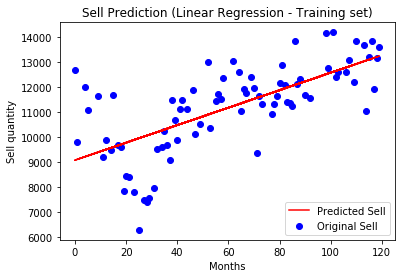

In [10]:
plt.scatter(month_train, sell_train, color = 'blue', label='Original Sell')
plt.plot(month_train, linear_regressor.predict(month_train), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Linear Regression - Training set)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Linear Regression - Training set')
plt.show()

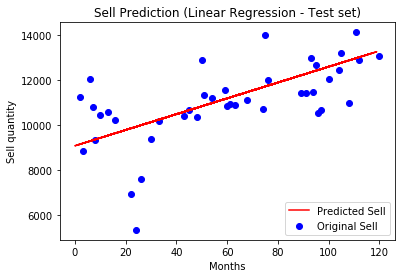

In [11]:
plt.scatter(month_test, sell_test, color = 'blue', label='Original Sell')
plt.plot(month_train, linear_regressor.predict(month_train), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Linear Regression - Test set)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Linear Regression - Test set')
plt.show()

In [12]:
linear_accuracy = linear_regressor.score(month, sell, sample_weight=None)
print("Linear Regression Accuracy: %.3f%%" % (linear_accuracy*100.0))

Linear Regression Accuracy: 42.924%


In [13]:
linear_sell_pred = linear_regressor.predict(month_train)
print('\033[1;35;47m Test months are: \033[0m', *month_test)
mi = input('\n\033[1;37;40m Enter number of month: \033[0m')
m = int(mi)
for i in range(0,len(month_test)):
    if(month_test[i] == m):
        print('\n\033[1;31;47m Predicted Sell quantity: \033[0m', linear_sell_pred[i])
        break;
print('\n\033[1;34;47m Original Sell quantity: \033[0m', sell[m])

 Test months are:  [48] [94] [95] [8] [97] [22] [7] [10] [45] [89] [33] [50] [2] [60] [120] [74] [30] [43] [112] [76] [63] [59] [16] [24] [111] [13] [54] [93] [26] [68] [51] [104] [108] [61] [3] [96] [6] [75] [100] [91] [105]

 Enter number of month: 48

 Predicted Sell quantity:  [ 12025.63752107]

 Original Sell quantity:  [ 10372.]


# Polynomial Regression

Best degree 4 with RMSE 1192.9633267709025


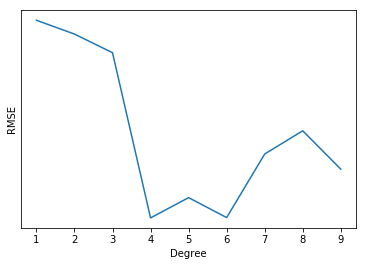

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    month_poly_train = poly_features.fit_transform(month_train)

    poly_reg = LinearRegression()
    poly_reg.fit(month_poly_train, sell_train)

    month_poly_test = poly_features.fit_transform(month_test)
    poly_predict = poly_reg.predict(month_poly_test)
    poly_mse = mean_squared_error(sell_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

In [15]:
poly_regressor = PolynomialFeatures(degree = 4)
month_poly = poly_regressor.fit_transform(month)
poly_regressor.fit(month_poly, sell)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(month_poly, sell)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

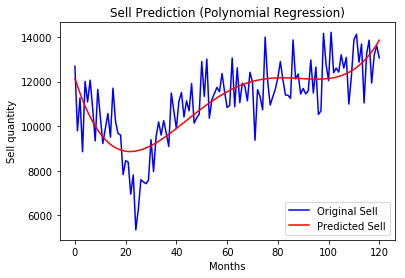

In [16]:
plt.plot(month, sell, color = 'blue', label='Original Sell')
plt.plot(month, linear_regressor_2.predict(poly_regressor.fit_transform(month)), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Polynomial Regression)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Polynomial Regression')
plt.show()

In [17]:
from sklearn.metrics import r2_score
sell_pred_poly = linear_regressor_2.predict(poly_regressor.fit_transform(month))
poly_accuracy = r2_score(sell, sell_pred_poly)
print("Polynomial Regression Accuracy: %.3f%%" % (poly_accuracy*100.0))

Polynomial Regression Accuracy: 60.108%


In [18]:
mi = input('\n\033[1;37;40m Enter number of month: \033[0m')
m = int(mi)
print('\n\033[1;31;47m Predicted Sell quantity: \033[0m', sell_pred_poly[m])
print('\n\033[1;34;47m Original Sell quantity: \033[0m', sell[m])


 Enter number of month: 48

 Predicted Sell quantity:  [ 10617.92939741]

 Original Sell quantity:  [ 10372.]


#  Support Vector Regression

In [19]:
from sklearn.preprocessing import StandardScaler
sc_month = StandardScaler()
month_train = sc_month.fit_transform(month_train)
month_test = sc_month.transform(month_test)
sc_sell = StandardScaler()
sell_train = np.reshape(sell_train, (-1, 1))
sell_train = sc_sell.fit_transform(sell_train)

C:\Users\MAK\Anaconda3\envs\workshop\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(month,sell)

C:\Users\MAK\Anaconda3\envs\workshop\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
svr_sell_pred = svr_regressor.predict(6.5)
svr_sell_pred = sc_sell.inverse_transform(svr_sell_pred)

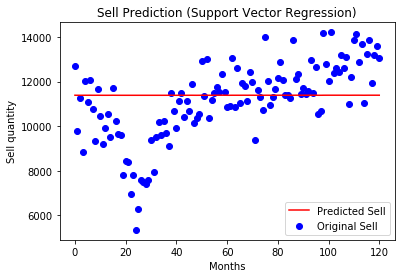

In [22]:
plt.scatter(month, sell, color = 'blue', label='Original Sell')
plt.plot(month, svr_regressor.predict(month), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Support Vector Regression)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Support Vector Regression')
plt.show()

In [23]:
svr_accuracy = svr_regressor.score(month, sell)
print("Support Vector Regression Accuracy: %.3f%%" % (svr_accuracy*100.0))

Support Vector Regression Accuracy: -1.940%


# Decision tree regression

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth = 5, random_state = 1)
dt_regressor.fit(month, sell)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [25]:
dt_sell_pred = dt_regressor.predict(month)

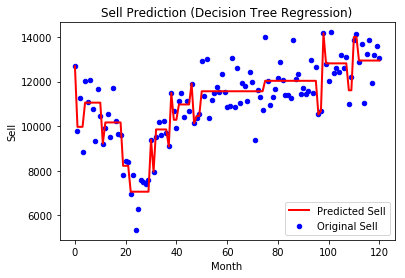

In [26]:
plt.scatter(month, sell, s=20, color = 'blue', label='Original Sell')
plt.plot(month, dt_sell_pred, color = 'red', label='Predicted Sell', linewidth=2)
plt.title('Sell Prediction (Decision Tree Regression)')
plt.xlabel('Month')
plt.ylabel('Sell')
plt.legend(loc='lower right')
plt.savefig('Decision Tree Regression')
plt.show()

In [27]:
dt_accuracy = dt_regressor.score(month, sell)
print("Decision Tree Regression Accuracy: %.3f%%" % (dt_accuracy*100.0))

Decision Tree Regression Accuracy: 83.336%


# Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(month, sell)

C:\Users\MAK\Anaconda3\envs\workshop\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
rf_sell_pred = rf_regressor.predict(6.5)

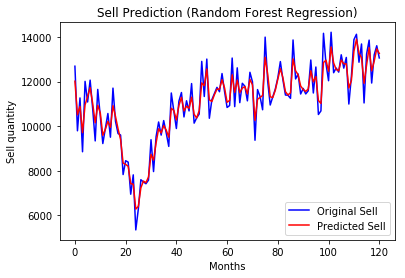

In [30]:
#plt.scatter(month, sell, color = 'blue',label='Original Sell')
plt.plot(month, sell, color = 'blue', label = 'Original Sell')
plt.plot(month, rf_regressor.predict(month), color = 'red', label = 'Predicted Sell')
plt.title('Sell Prediction (Random Forest Regression)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc = 'lower right')
plt.savefig('Random Forest Regression')
plt.show()

In [31]:
rf_accuracy = rf_regressor.score(month, sell)
print("Random Forest Regression Accuracy: %.3f%%" % (rf_accuracy*100.0))

Random Forest Regression Accuracy: 93.376%


In [44]:
sell_pred_rf = rf_regressor.predict(month)
year_x = dataset.iloc[:,0]
month_x = dataset.iloc[:,1]
year_i = input('\n\033[1;37;40m Enter year: \033[0m')
month_i = input('\n\033[1;37;40m Enter month: \033[0m')
#print(sell_pred_rf)
for i in range(1,len(year_x)):
    if(str(year_i) == str(year_x[i])):
        for j in range(i, i+12):
            if(str(month_i) == str(month_x[j])):
                print('\n\033[1;31;47m Predicted Sell quantity: \033[0m', sell_pred_rf[j])
                print('\n\033[1;34;47m Original Sell quantity: \033[0m', sell[j])
                break
            else:
                print('\n\033[1;31;47m Incorrect Choice \033[0m')
                break
        break


 Enter year: 2010

 Enter month: 44

 Incorrect Choice 


# THE END

sell_pred_rf = rf_regressor.predict(month)
mi = input('\n\033[1;37;40m Enter number of month: \033[0m')
m = int(mi)
print('\n\033[1;31;47m Predicted Sell quantity: \033[0m', sell_pred_rf[m])
print('\n\033[1;34;47m Original Sell quantity: \033[0m', sell[m])